# **Problem Statement**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

Objective of analysis:
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands


**Column Profiling:**
- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
    - 1: Clear, Few clouds, partly cloudy, partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

# **Loading dependencies and dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, kruskal
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('./data/yulu_bike_sharing.txt')
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


# **Basic Checks on the data**

**Shape**

In [3]:
df.shape

(10886, 12)

**Information on dataframe**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Converting the dtype of datetime column**

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

**Missing values**

In [6]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# **EDA: Univariate Analysis**

## **Categorical columns**

In [7]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']

**Printing the count of different categories for wach of the columns**

In [8]:
for col in cat_cols:
    print('Column:', col)
    print(df[col].value_counts())
    print('-'*50)

Column: season
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
--------------------------------------------------
Column: holiday
0    10575
1      311
Name: holiday, dtype: int64
--------------------------------------------------
Column: workingday
1    7412
0    3474
Name: workingday, dtype: int64
--------------------------------------------------
Column: weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
--------------------------------------------------


## **Continuous columns**

In [9]:
cont_cols = ['temp', 'atemp', 'humidity', 'windspeed']

In [10]:
df[cont_cols].describe()

,temp,atemp,humidity,windspeed
count,10886.00000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395
std,7.79159,8.474601,19.245033,8.164537
min,0.82000,0.760000,0.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500
50%,20.50000,24.240000,62.000000,12.998000
75%,26.24000,31.060000,77.000000,16.997900
max,41.00000,45.455000,100.000000,56.996900


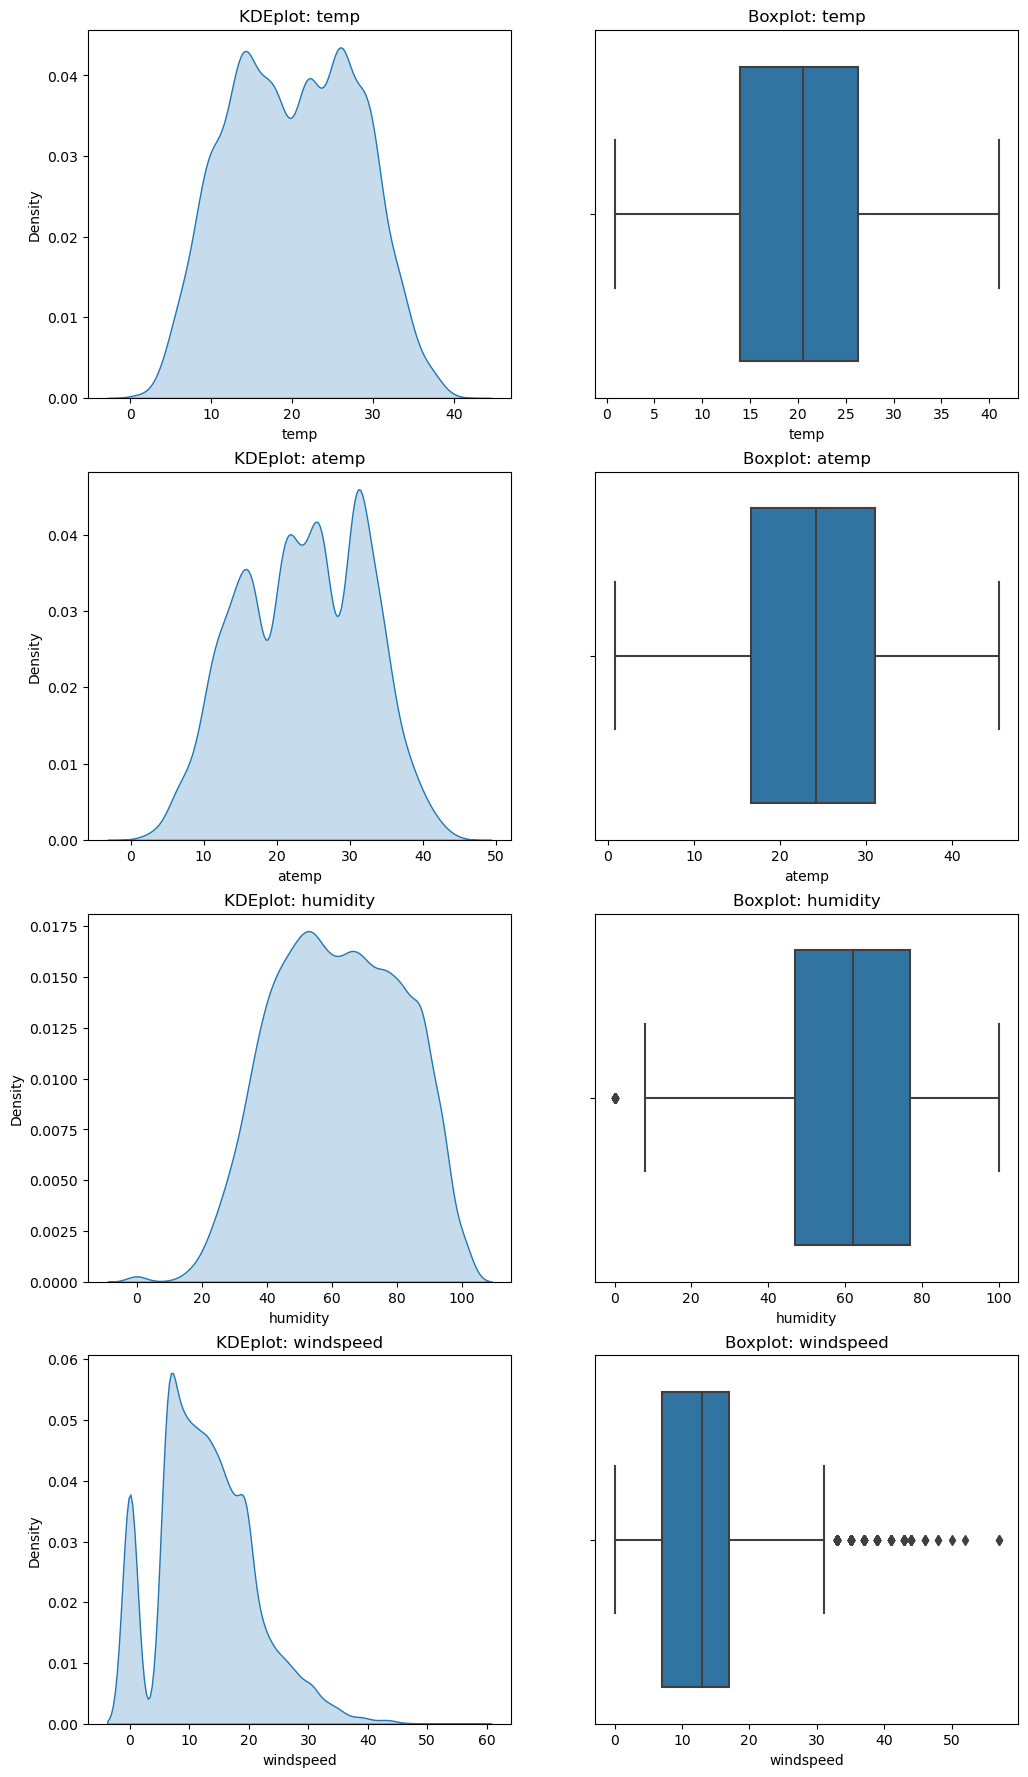

In [11]:
plt.figure(figsize=(12, 22))
i = 1
for col in cont_cols:
    plt.subplot(4,2,i)
    sns.kdeplot(x=df[col], fill=True)
    plt.title(f'KDEplot: {col}')
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    i += 2
plt.show()

**Observations:**
- Temperature does not have any outliers
- Humidity is also having very few ouliers
- Windspeed shows presence of many ouliers as shown by the boxplot

# **EDA: Bivariate analysis**

## **Number of rentals vs continuous variables**
- Temperature
- Feeling Temperature
- Humidity
- Windspeed

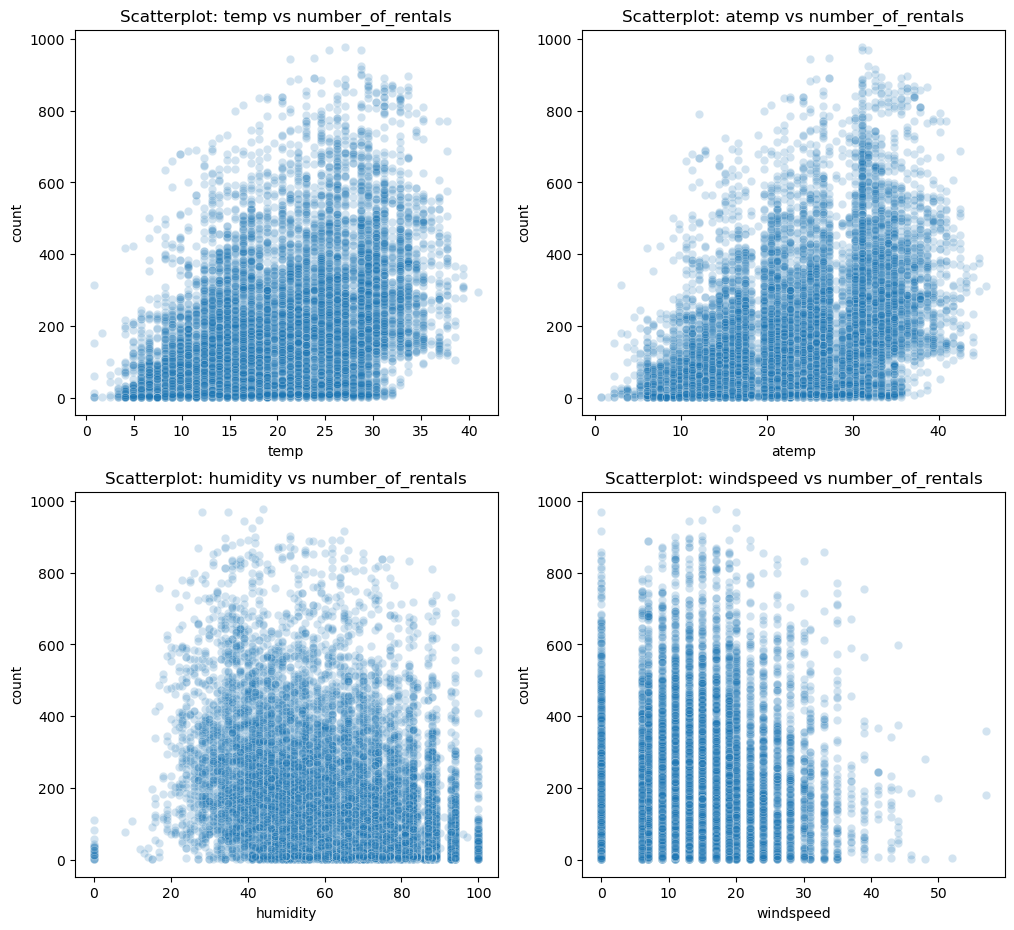

In [12]:
cont_cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(12, 11))
i = 1
for col in cont_cols:
    plt.subplot(2, 2, i)
    sns.scatterplot(x = df[col], y=df['count'], alpha=0.2)
    plt.title(f'Scatterplot: {col} vs number_of_rentals')
    i += 1
plt.show()

**Correlation matrix & heatmap:**

In [13]:
df[['atemp', 'humidity', 'windspeed', 'count']].corr()

,atemp,humidity,windspeed,count
atemp,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.057473,-0.318607,1.000000,0.101369
count,0.389784,-0.317371,0.101369,1.000000


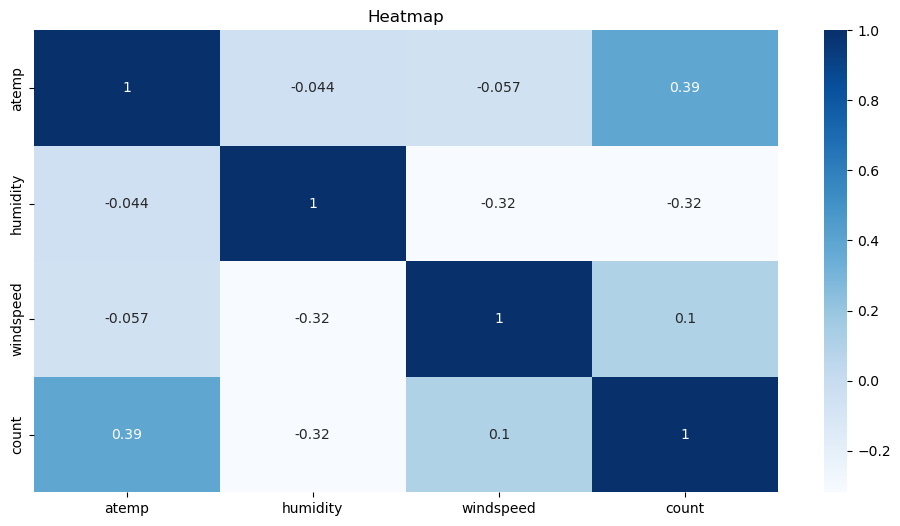

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[['atemp', 'humidity', 'windspeed','count']].corr(), cmap='Blues', annot=True)
plt.title('Heatmap')
plt.show()

**Observations:**
- We see that Feeling temperature has a positive correlation (+0.4) with the number of bikes rented
- Humidity has a negative correlation (-0.3) with the number of bikes rented

## **Number of rentals vs continuous variables across Season & Weather**
- Feeling Temperature
- Humidity

In [15]:
def transform(x):
    if x == 1:
        return '1'
    elif x == 2:
        return '2'
    elif x == 3:
        return '3'
    return '4'

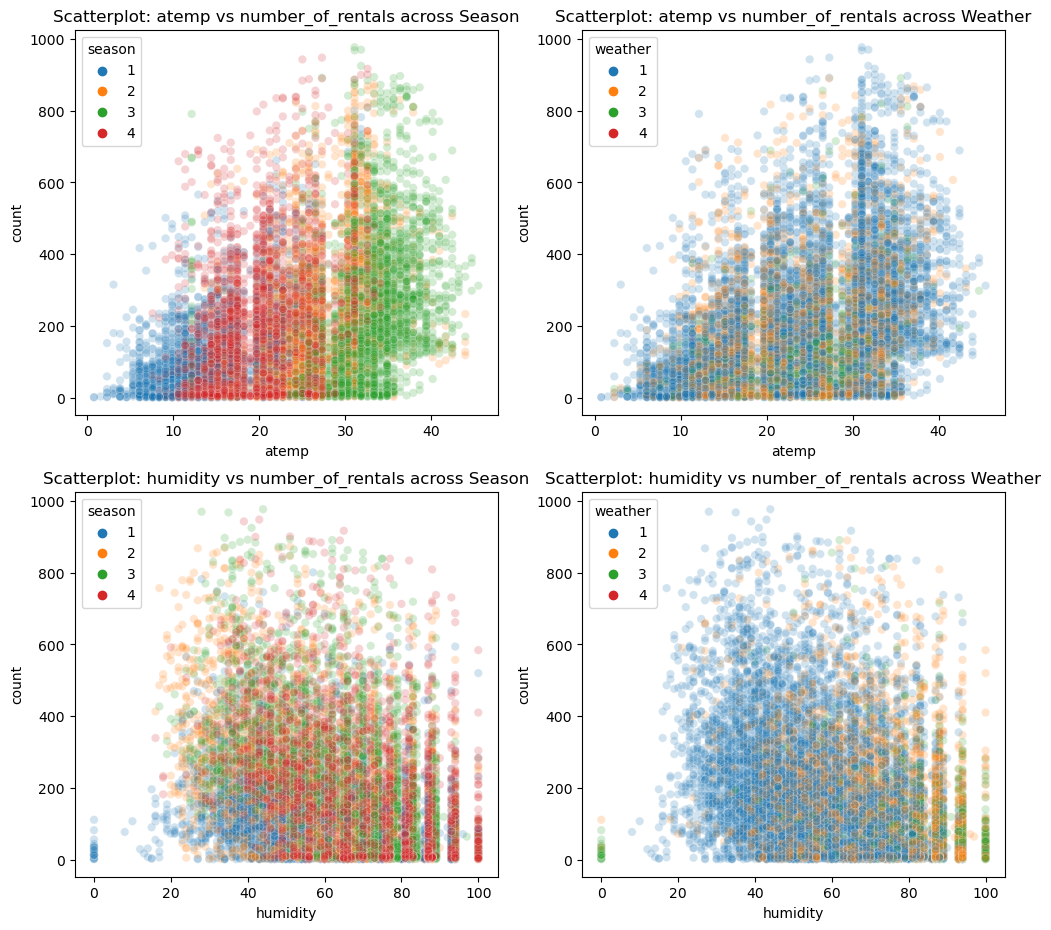

In [16]:
cont_cols_2 = ['atemp', 'humidity']
plt.figure(figsize=(12, 11))
i = 1
for col in cont_cols_2:
    plt.subplot(2, 2, i)
    sns.scatterplot(x = df[col], y=df['count'], hue=df['season'].apply(transform), alpha=0.2)
    plt.title(f'Scatterplot: {col} vs number_of_rentals across Season')
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x = df[col], y=df['count'], hue=df['weather'].apply(transform), alpha=0.2)
    plt.title(f'Scatterplot: {col} vs number_of_rentals across Weather')
    i += 2
plt.show()

**Observations:**
- Feeling Temperature vs number_of_rentals:
    - We do get a sense of the season-wise variation of the temperature
    - Also seasons 2 and 3 have data points where a high number of bikes were rented
    - When we see the data across weather, most of the data points seem to be blue (weather 1)
- Humidity vs number_of_rentals:
    - Season 4 seems to be the most humid season
    - Weather 1 seems to have lesser humidity than the other weathers

# **EDA: E-bike Rentals: Understanding the temporal impact**

## **Renting behaviour of users (Casual vs Registered)**

In [17]:
target_cols = ['casual', 'registered', 'count']
df[target_cols].describe()

,casual,registered,count
count,10886.000000,10886.000000,10886.000000
mean,36.021955,155.552177,191.574132
std,49.960477,151.039033,181.144454
min,0.000000,0.000000,1.000000
25%,4.000000,36.000000,42.000000
50%,17.000000,118.000000,145.000000
75%,49.000000,222.000000,284.000000
max,367.000000,886.000000,977.000000


In [18]:
total_count_casual_reg = [df['casual'].sum(), df['registered'].sum()]
total_count_casual_reg

[392135, 1693341]

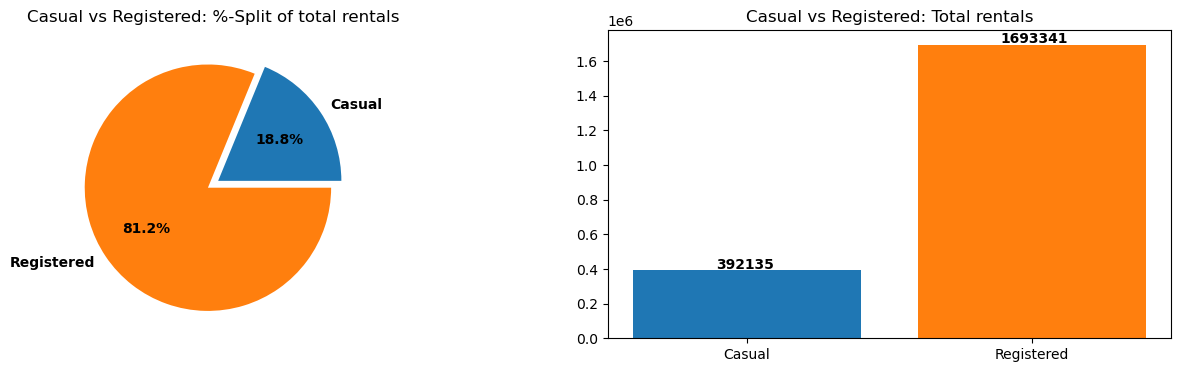

In [19]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.pie(total_count_casual_reg, labels=['Casual', 'Registered'], explode=(0.05, 0.05), 
        autopct='%.1f%%', textprops = {'fontweight': 'bold', 'fontsize': 10})
plt.title('Casual vs Registered: %-Split of total rentals')
plt.subplot(1, 2, 2)
plt.bar(x=['Casual', 'Registered'], height=total_count_casual_reg, color=['tab:blue', 'tab:orange'])
for i, data in enumerate(total_count_casual_reg):
    plt.text(x=i-0.11, y=data+10000, s=data, color='black', fontsize=10, fontweight='bold')
plt.title('Casual vs Registered: Total rentals')
plt.show()

**Observations:**
- The above plot shows the %-split b/w the casual and registered customers as far as the total number of booking asre concerned
- Casual rental activity amounts to ~20% of the total rental activity
- The bulk of rental activity (~80%) is done by registered customers

## **Hour wise rental trend**

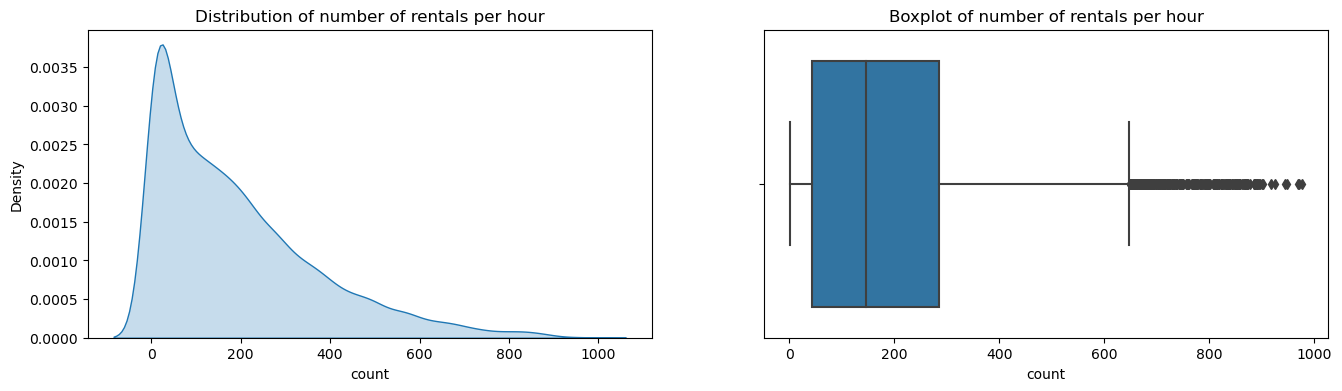

In [20]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(x=df['count'], fill=True)
# sns.histplot(x=df['count'])
plt.title('Distribution of number of rentals per hour')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['count'])
plt.title('Boxplot of number of rentals per hour')
plt.show()

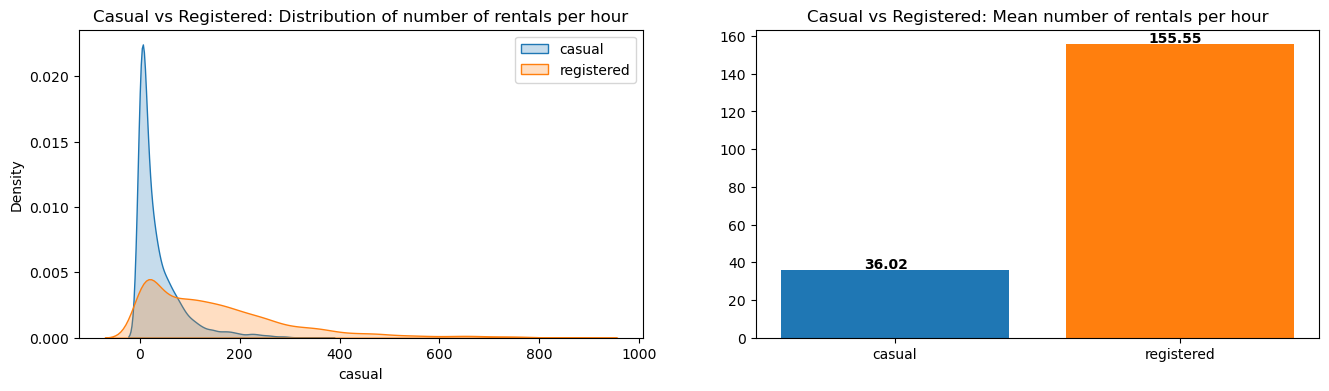

In [21]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
for col in ['casual', 'registered']:
    sns.kdeplot(x=df[col], fill=True, label=col)
plt.legend()
# sns.histplot(x=df_day_wise_count['count_sum'])
plt.title('Casual vs Registered: Distribution of number of rentals per hour')
plt.subplot(1, 2, 2)
plt.bar(x=['casual', 'registered'], height=[df['casual'].mean(), df['registered'].mean()], 
        color=['tab:blue', 'tab:orange'])
for i, data in enumerate([df['casual'].mean(), df['registered'].mean()]):
    plt.text(x=i-0.11, y=data+1, s=round(data,2), color='black', fontsize=10, fontweight='bold')
plt.title('Casual vs Registered: Mean number of rentals per hour')
plt.show()

**Observations:**
- The rental activity per hour shows a right skewed distribution for both casual and registered customers.
- The mean number of bikes rented by registered customers clearly outnumber that by casual customers

## **Day wise rental trend**

In [22]:
df_day_wise_count = df.groupby(df['datetime'].dt.date)[target_cols].agg(['sum'])
# df_day_wise_count.columns = [('_').join(lst) for lst in df_day_wise_count.columns]
df_day_wise_count.columns = [lst[0] for lst in df_day_wise_count.columns]
df_day_wise_count.reset_index(inplace=True)
df_day_wise_count['datetime'] = pd.to_datetime(df_day_wise_count['datetime'])
df_day_wise_count.head()

,datetime,casual,registered,count
0,2011-01-01,331,654,985
1,2011-01-02,131,670,801
2,2011-01-03,120,1229,1349
3,2011-01-04,108,1454,1562
4,2011-01-05,82,1518,1600


In [23]:
df_day_wise_count['year'] = df_day_wise_count['datetime'].dt.year
df_day_wise_count['month'] = df_day_wise_count['datetime'].dt.month
# df_day_wise_count.groupby(['year', 'month'])['count'].agg(['count'])

In [24]:
df_day_wise_count.describe()

,casual,registered,count,year,month
count,456.000000,456.000000,456.000000,456.000000,456.000000
mean,859.945175,3713.467105,4573.412281,2011.500000,6.500000
std,698.913571,1494.477105,1868.740135,0.500549,3.455844
min,9.000000,491.000000,605.000000,2011.000000,1.000000
25%,318.000000,2696.000000,3305.500000,2011.000000,3.750000
50%,722.000000,3700.000000,4585.500000,2011.500000,6.500000
75%,1141.750000,4814.250000,5987.500000,2012.000000,9.250000
max,3410.000000,6911.000000,8714.000000,2012.000000,12.000000


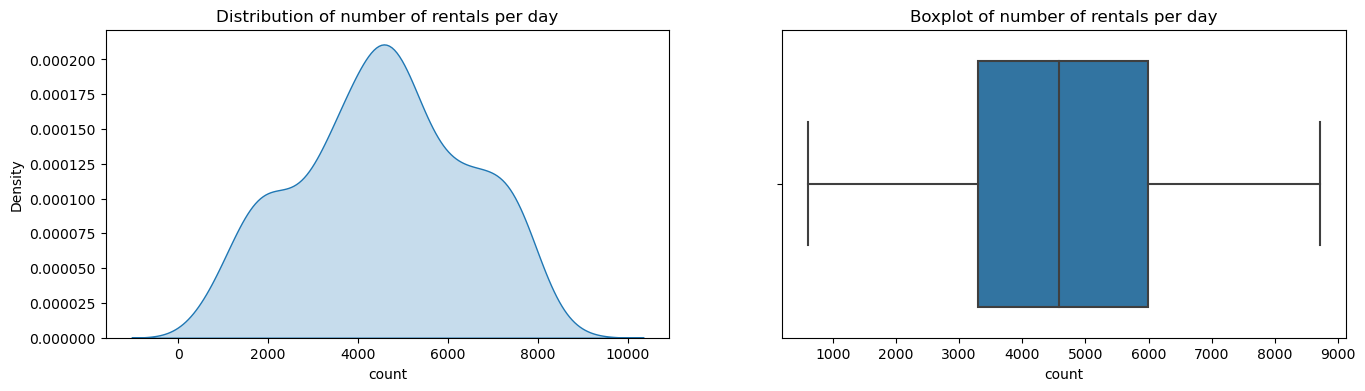

In [25]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(x=df_day_wise_count['count'], fill=True)
# sns.histplot(x=df_day_wise_count['count_sum'])
plt.title('Distribution of number of rentals per day')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_day_wise_count['count'])
plt.title('Boxplot of number of rentals per day')
plt.show()

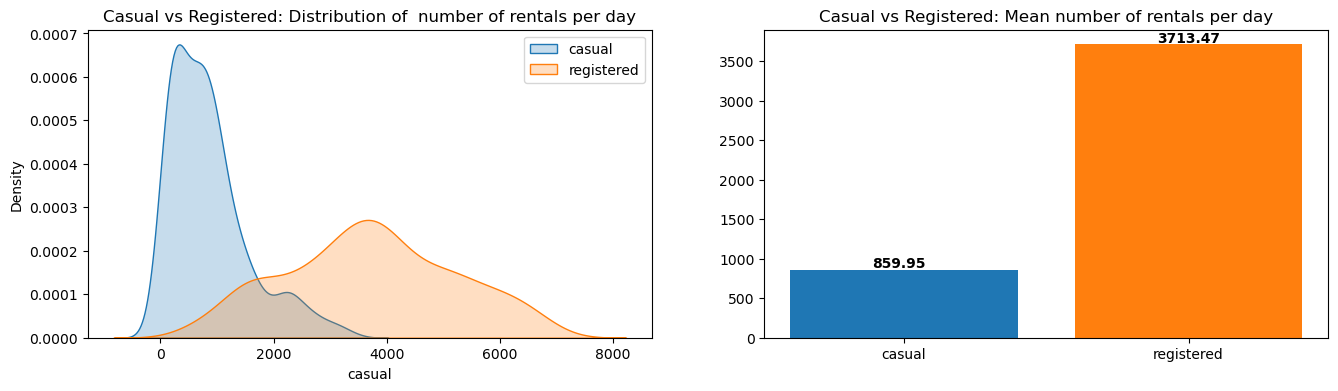

In [26]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
for col in ['casual', 'registered']:
    sns.kdeplot(x=df_day_wise_count[col], fill=True, label=col)
plt.legend()
# sns.histplot(x=df_day_wise_count['count_sum'])
plt.title('Casual vs Registered: Distribution of  number of rentals per day')
plt.subplot(1, 2, 2)
plt.bar(x=['casual', 'registered'], height=[df_day_wise_count['casual'].mean(), df_day_wise_count['registered'].mean()], 
        color=['tab:blue', 'tab:orange'])
for i, data in enumerate([df_day_wise_count['casual'].mean(), df_day_wise_count['registered'].mean()]):
    plt.text(x=i-0.11, y=data+30, s=round(data,2), color='black', fontsize=10, fontweight='bold')
plt.title('Casual vs Registered: Mean number of rentals per day')
plt.show()

**Observations:**
- The number of bikes rented per day is shown above.
- Clearly the mean of renting done by registered customers outnumber that by casual customers
- Also as evident from the kdeplot:
    - The max renting done by casual customers happend somewhere around 4000 per day
    - However for registered customers, this number reachs close to 8000 per day

## **Slot wise rental trend**

In [27]:
df_time_slot = df.copy()
df_time_slot['time'] = df_time_slot['datetime'].dt.time
df_time_slot['time'] = df_time_slot['time'].apply(lambda x: int(str(x).split(':')[0]))
bins_ts = [-1, 2, 8, 14, 20, 24]
label_ts = ['Night_9PM-2AM', 'Morning_3AM-8AM', 'Day_9AM-2PM', 'Evening_3PM-8PM', 'Night_9PM-2AM']
df_time_slot['time_slot'] = pd.cut(df_time_slot['time'], bins = bins_ts, labels = label_ts, ordered=False)
df_time_slot.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,time_slot
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,Night_9PM-2AM
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,Night_9PM-2AM
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,Night_9PM-2AM
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,Morning_3AM-8AM
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,Morning_3AM-8AM


In [28]:
df_slot_wise_mean = df_time_slot.groupby('time_slot')[target_cols].agg(['mean'])
df_slot_wise_mean.columns = [lst[0] for lst in df_slot_wise_mean.columns]
df_slot_wise_mean.reset_index(inplace=True)
df_slot_wise_mean = df_slot_wise_mean.sort_values(by='count')
df_slot_wise_mean[target_cols] = df_slot_wise_mean[target_cols]*6
df_slot_wise_mean
# list(df_slot_wise_mean['time_slot'])

,time_slot,casual,registered,count
3,Night_9PM-2AM,88.498349,421.233028,509.731376
2,Morning_3AM-8AM,42.421248,656.502972,698.924220
0,Day_9AM-2PM,356.698134,1008.753019,1365.451153
1,Evening_3PM-8PM,373.756579,1640.335526,2014.092105


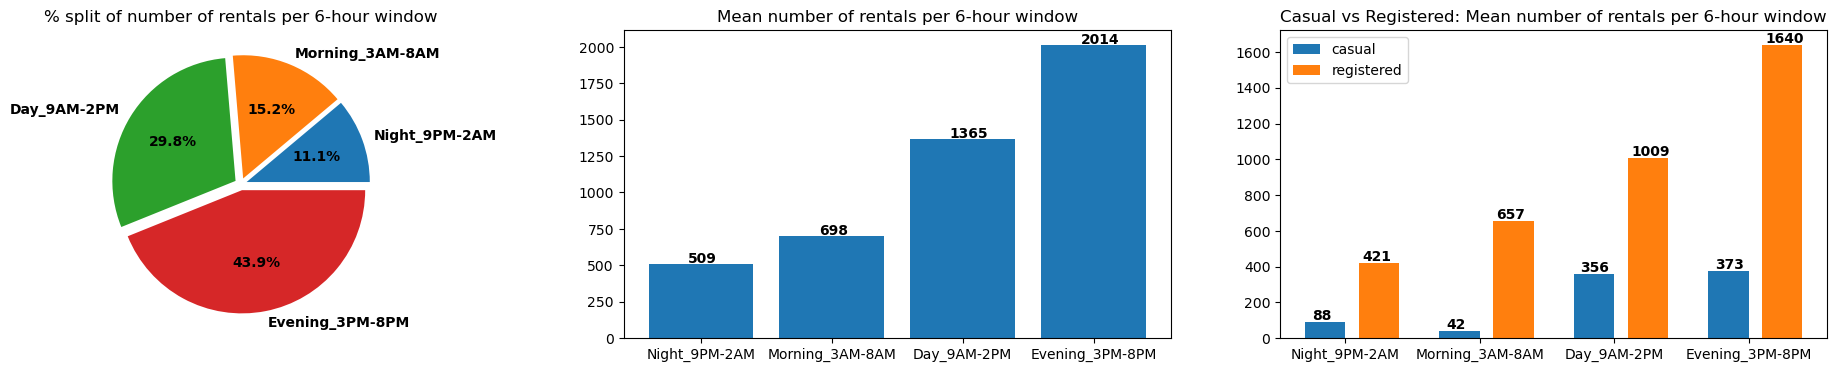

In [29]:
plt.figure(figsize=(24, 4))
plt.subplot(1, 3, 1)
plt.pie(df_slot_wise_mean['count'], labels=list(df_slot_wise_mean['time_slot']), explode=(0.05, 0.05, 0.05, 0.05), 
        autopct='%.1f%%', textprops = {'fontweight': 'bold', 'fontsize': 10})
plt.title('% split of number of rentals per 6-hour window')
plt.subplot(1, 3, 2)
plt.bar(x=df_slot_wise_mean['time_slot'], height=df_slot_wise_mean['count'])
for ind,data in enumerate(df_slot_wise_mean['count']):
    plt.text(x=ind-0.1, y=data+10, s=f'{int(data)}', color='black', fontsize=10, fontweight='bold', rotation=0)
plt.title('Mean number of rentals per 6-hour window')
plt.subplot(1, 3, 3)
index = np.arange(4)
width = 0.3
plt.bar(x=index, height=df_slot_wise_mean['casual'], width=width, label='casual', color='tab:blue')
plt.bar(x=index+width+0.1, height=df_slot_wise_mean['registered'], width=width, label='registered', color='tab:orange')
for ind,data in enumerate(df_slot_wise_mean['casual']):
    plt.text(x=ind-0.1, y=data+12, s=f'{int(data)}', color='black', fontsize=10, fontweight='bold', rotation=0)
for ind,data in enumerate(df_slot_wise_mean['registered']):
    plt.text(x=ind+0.275, y=data+12, s=f'{int(round(data, 0))}', color='black', fontsize=10, fontweight='bold', rotation=0)
plt.xticks(ticks=index+(width/2), labels=list(df_slot_wise_mean['time_slot']))
plt.legend()
plt.title('Casual vs Registered: Mean number of rentals per 6-hour window')
plt.show()

**Observations:**
- 3PM-8PM is the time slot where the maximum number of rentals happen over the course of 24 hours
- The lowest renting activity happens during 9PM-2AM

## **Month wise rental trend**

In [30]:
df_month_wise_count = df_day_wise_count.groupby(['year', 'month'])[target_cols].agg(['sum'])
df_month_wise_count.columns = [lst[0] for lst in df_month_wise_count.columns]
df_month_wise_count.reset_index(inplace=True)
df_month_wise_count['year_mon'] = df_month_wise_count[['year', 'month']].apply(lambda x: str(x['year']) + str('_') + str(x['month']), axis=1)
df_month_wise_count.head()

,year,month,casual,registered,count,year_mon
0,2011,1,2008,21544,23552,2011_1
1,2011,2,3776,29068,32844,2011_2
2,2011,3,7910,30825,38735,2011_3
3,2011,4,12229,38288,50517,2011_4
4,2011,5,15865,63848,79713,2011_5


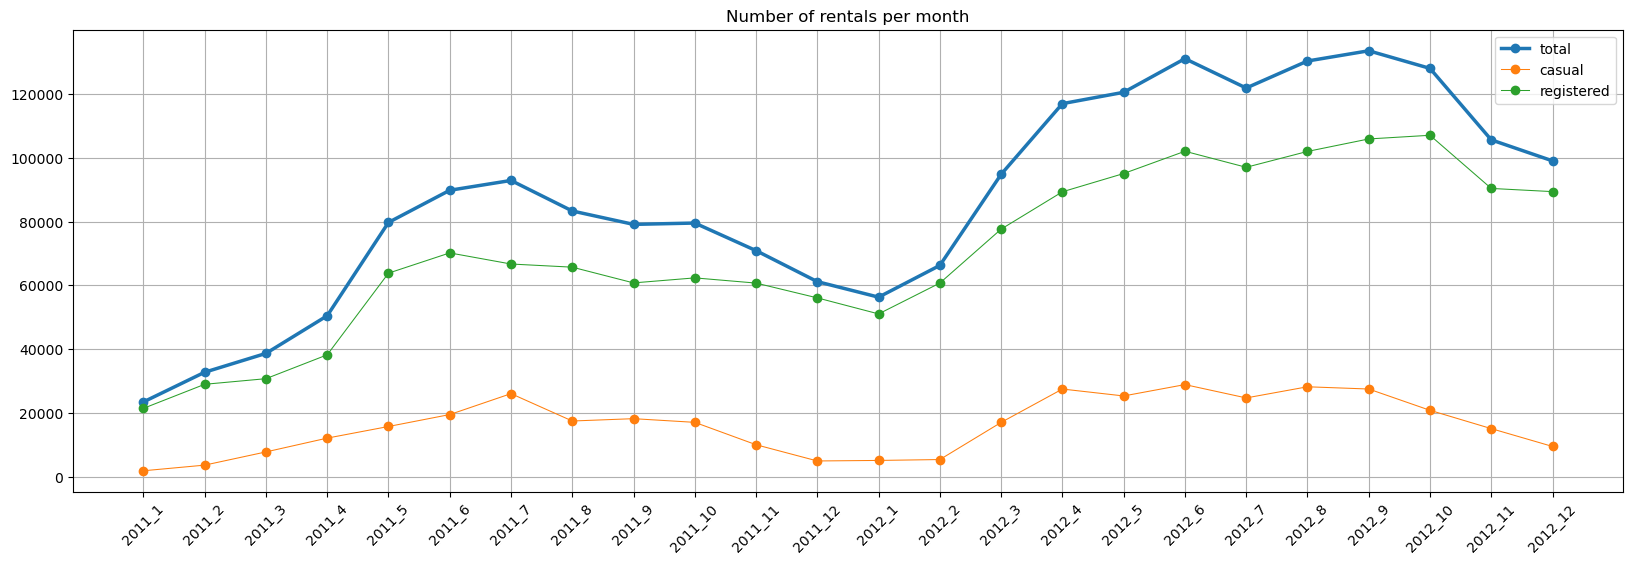

In [31]:
plt.figure(figsize=(20,6))
plt.plot(df_month_wise_count['year_mon'], df_month_wise_count['count'], marker='o', linewidth=2.5, label='total')
plt.plot(df_month_wise_count['year_mon'], df_month_wise_count['casual'], marker='o', linewidth=0.75, label='casual')
plt.plot(df_month_wise_count['year_mon'], df_month_wise_count['registered'], marker='o', linewidth=0.75, label='registered')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.title('Number of rentals per month')
plt.show()

**Observations:**
- We can see that total monthly rentals has been showing both upward and downward trends
- This is established since we can see prominent peaks and valleys in the trend
- The recently few months show a declining trend and is a casue of concern

# **EDA: E-bike Rentals: Understanding the impact of working day**

- The data we have is at the hour level
- We will aggregate and look at the data at the day level
- This is because the parameter 'working day' will not change across the hours for any given day

In [32]:
df_day_wise_workday_count = df.groupby(df['datetime'].dt.date)[['workingday', 'count']].agg(workingday=('workingday', 'mean'), count=('count', 'sum'))
df_day_wise_workday_0 = df_day_wise_workday_count.loc[df_day_wise_workday_count['workingday'] == 0, 'count']
df_day_wise_workday_1 = df_day_wise_workday_count.loc[df_day_wise_workday_count['workingday'] == 1, 'count']
print('Sample size:')
print('-'*50)
print('Workday_0:', df_day_wise_workday_0.size)
print('Workday_1:', df_day_wise_workday_1.size)

Sample size:
--------------------------------------------------
Workday_0: 145
Workday_1: 311


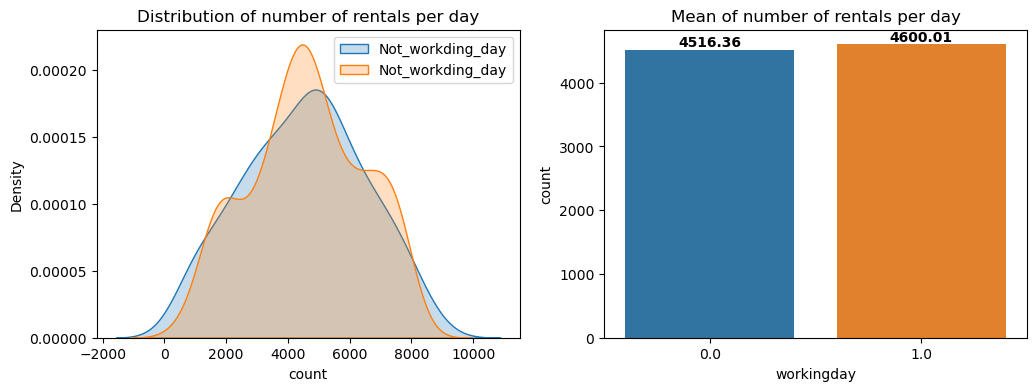

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(x=df_day_wise_workday_0, fill=True, label='Not_workding_day')
sns.kdeplot(x=df_day_wise_workday_1, fill=True, label='Not_workding_day')
plt.title('Distribution of number of rentals per day')
plt.legend()
plt.subplot(1, 2, 2)
f = sns.barplot(x=df_day_wise_workday_count['workingday'], y=df_day_wise_workday_count['count'], ci=None)
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold')
plt.title('Mean of number of rentals per day')
plt.show()

## **Observations & Hypothesis formation:**

- We do see that the mean number of rentals vary across whether it is a working day or not. 
- We wish to find whether the imapct of working day on the renting of e-bikes is significant or not.
- Hence we propose the following:
    - ***H0: Working day does NOT impact the renting of e-bikes (u1=u2)***
        - That is working day & the renting of e-bikes are independent
    - ***H1: Working day does impact the renting of e-bikes (u1!=u2)***
        - That is working day & the renting of e-bikes are dependent)***
    - ***We propose to perform a ttest, setting significance level = 5%***

## **Levene's Test: For testing homogeneity of variance**

In [34]:
print('Standard deviations:')
print('-'*50)
print('Workday_0:', df_day_wise_workday_0.std())
print('Workday_1:', df_day_wise_workday_1.std())

Standard deviations:
--------------------------------------------------
Workday_0: 1956.3917349288931
Workday_1: 1829.0653138733692


In [35]:
# H0: Variance b/w the groups are equal
# H1: Variance b/w the groups are NOT equal
levene_stat, p_value = levene(df_day_wise_workday_0.values, df_day_wise_workday_1.values)
print('levene_stat:', round(levene_stat,2), 'p_value:', round(p_value,2))
print('-'*50)
if p_value < 0.05:
    print('Reject H0, accept H1')
else:
    print('Fail to reject H0')

levene_stat: 1.17 p_value: 0.28
--------------------------------------------------
Fail to reject H0


## **Assumptions for ttest:**

- ***The data has to be continuous in nature***
    - Comments:
        - The data we have (number of rentals per day) is indeed continuous in nature
- ***The sample has to random***
    - To obviate any bias
    - To be a true representation of the population
    - Comments:
        - We believe that the data we have is a truely ramdom sample
- ***Data has to be gaussian***
    - Either the original data is gaussian. In this case the sample size can be small (n < 30)
    - The original data is NOT gausiian. But sample size is sufficient. By CLT, the distribution of sample means will be gaussian
    - Comments:
        - The data we have is NOT gaussian, but thankfully we have a sufficiently large sample size (n = 145).
        - Thus by CLT, the distribution of sample means can be assuumed to be gaussian
- ***Homogeneity of variance b/w the two groups of data***
    - Comments:
        - Using levene's test we concluded that there is homogeneity of variance b/w the 2 groups (workday=0 & workday=1)
        - p_value = 0.28

## **Ttest:**

In [36]:
t_stat, p_value = ttest_ind(df_day_wise_workday_0, df_day_wise_workday_1)
print('t_stat:', round(t_stat,2), 'p_value:', round(p_value,2))
print('-'*50)
if p_value < 0.05:
    print('Reject H0, accept H1')
else:
    print('Fail to reject H0')

t_stat: -0.44 p_value: 0.66
--------------------------------------------------
Fail to reject H0


## **Conclusion:**
- ***Working day does NOT impact the renting of e-bikes significantly.***

# **EDA: E-bike Rentals: Understanding the seasonal impact**

- We want to look at the hourly renting of e-bikes
- We want to see if season has any significant impact on this parameter

In [37]:
season_1 = df.loc[df['season']==1, 'count']
season_2 = df.loc[df['season']==2, 'count']
season_3 = df.loc[df['season']==3, 'count']
season_4 = df.loc[df['season']==4, 'count']
print('Sample size:')
print('-'*50)
print('Season:1', season_1.size)
print('Season:2', season_2.size)
print('Season:3', season_3.size)
print('Season:4', season_4.size)

Sample size:
--------------------------------------------------
Season:1 2686
Season:2 2733
Season:3 2733
Season:4 2734


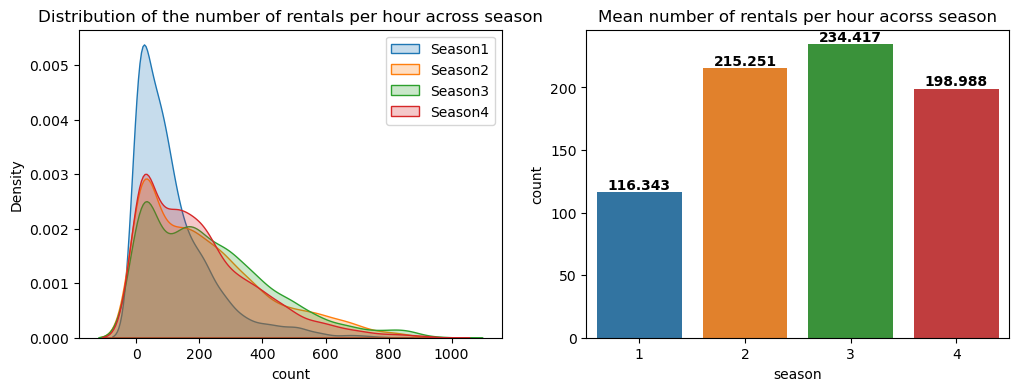

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(x=season_1, fill=True, label='Season1')
sns.kdeplot(x=season_2, fill=True, label='Season2')
sns.kdeplot(x=season_3, fill=True, label='Season3')
sns.kdeplot(x=season_4, fill=True, label='Season4')
plt.legend()
plt.title('Distribution of the number of rentals per hour across season')
plt.subplot(1, 2, 2)
f = sns.barplot(x=df['season'], y=df['count'], ci=None)
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold')
plt.title('Mean number of rentals per hour acorss season')
plt.show()

## **Observations & Hypothesis formation:**
- We do see that the mean number of rentals vary across the seasons. 
- We wish to find whether the imapct of season on the renting of e-bikes is significant or not.
- Hence we propose the following:
    - ***H0: Season does NOT impact the renting of e-bikes (u1=u2=u3=u4)***
        - That is season & the renting of e-bikes are independent
    - ***H1: Season does impact the renting of e-bikes (ui!=uj for any (i,j) such that i!=j)***
        - That is season & the renting of e-bikes are dependent
    - ***We propose to perform ANNOVA, setting significance level = 5%***

## **Testing whether the data is normal or not?**

As evident from the below plots, the data is clearly not gaussian

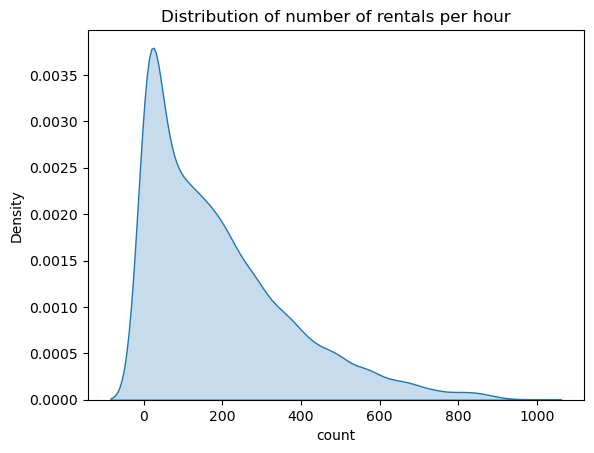

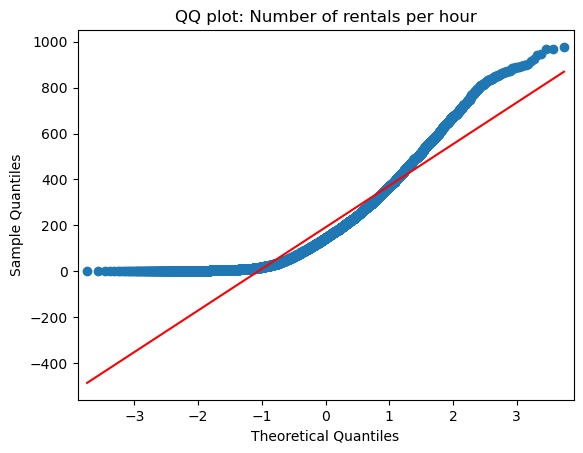

In [39]:
sns.kdeplot(x=df['count'], fill=True)
plt.title('Distribution of number of rentals per hour')
qqplot(df['count'], line="s")
plt.title('QQ plot: Number of rentals per hour')
plt.show()

## **Levene's Test: For testing homogeneity of variance**

In [40]:
print('Standard deviations:')
print('-'*50)
print('Season_1:', season_1.std())
print('Season_2:', season_2.std())
print('Season_3:', season_3.std())
print('Season_4:', season_4.std())

Standard deviations:
--------------------------------------------------
Season_1: 125.27397388810316
Season_2: 192.00784313546254
Season_3: 197.15100053680402
Season_4: 177.62240938763685


In [41]:
# H0: Variance b/w the groups are equal
# H1: Variance b/w the groups are NOT equal
levene_stat, p_value = levene(season_1, season_2, season_3, season_4)
print('levene_stat:', round(levene_stat,2), 'p_value:', round(p_value,2))
print('-'*50)
if p_value < 0.05:
    print('Reject H0, accept H1')
else:
    print('Fail to reject H0')

levene_stat: 187.77 p_value: 0.0
--------------------------------------------------
Reject H0, accept H1


## **Assumptions for ANNOVA:**

- ***Population is gaussian***
    - Comments:
        - The data we have does NOT meet this assumption
- ***Each sample is drawn independently of the other samples***
    - Comments:
        - - The data we have does meet this assumption
- ***Homogeneity of variance b/w the multiple groups in data***
    - Comments:
        - Using levene's test we concluded that there is NO homogeneity of variance b/w the multiple groups (season_1, season_2, season_3, season_4)
        - p_value = 0.0

## **Assumptions for ANNOVA failed, what next?**

- Since the assumptions for performing ANNOVA do not hold, we will perform Kruskal-Wallis test

## **Kruskal-Wallis Test:**

In [42]:
h_stat, p_value = kruskal(season_1, season_2, season_3, season_4)
print('h_stat:', round(h_stat,2), 'p_value:', round(p_value,2))
print('-'*50)
if p_value < 0.05:
    print('Reject H0, accept H1')
else:
    print('Fail to reject H0')

h_stat: 699.67 p_value: 0.0
--------------------------------------------------
Reject H0, accept H1


## **Conclusion**
- ***Season does impact the renting of e-bikes significantly.***

# **EDA: E-bike Rentals: Understanding the impact of weather**

- We want to look at the hourly renting of e-bikes
- We want to see if weather has any significant impact on this parameter

In [43]:
weather_1 = df.loc[df['weather']==1, 'count']
weather_2 = df.loc[df['weather']==2, 'count']
weather_3 = df.loc[df['weather']==3, 'count']
weather_4 = df.loc[df['weather']==4, 'count']
print('Sample size:')
print('-'*50)
print('Weather:1', weather_1.size)
print('Weather:2', weather_2.size)
print('Weather:3', weather_3.size)
print('Weather:4', weather_4.size)

Sample size:
--------------------------------------------------
Weather:1 7192
Weather:2 2834
Weather:3 859
Weather:4 1


**Ignoring the observation where weather=4**
- Since there is only one obseavation for weather=4, we do not consider it

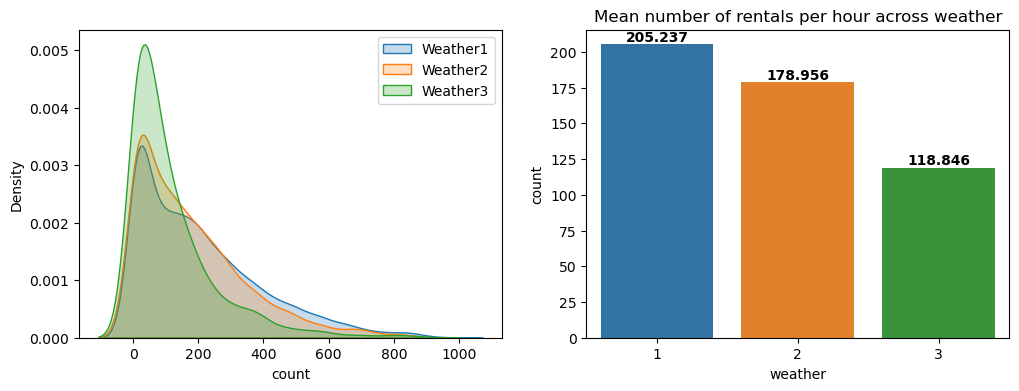

In [44]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(x=weather_1, fill=True, label='Weather1')
sns.kdeplot(x=weather_2, fill=True, label='Weather2')
sns.kdeplot(x=weather_3, fill=True, label='Weather3')
plt.legend()
plt.subplot(1, 2, 2)
f = sns.barplot(x=df.loc[df['weather']!=4, 'weather'], y=df.loc[df['weather']!=4, 'count'], ci=None)
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold')
plt.title('Mean number of rentals per hour across weather')
plt.show()

## **Observations & Hypothesis formation:**
- We do see that the mean number of rentals vary across the weather. 
- We wish to find whether the imapct of weather on the renting of e-bikes is significant or not.
- Hence we propose the following:
    - ***H0: Weather does NOT impact the renting of e-bikes (u1=u2=u3)***
        - That is season & the renting of e-bikes are independent
    - ***H1: Weather does impact the renting of e-bikes (ui!=uj for any (i,j) such that i!=j)***
        - That is season & the renting of e-bikes are dependent
    - ***We propose to perform ANNOVA, setting significance level = 5%***

## **Levene's Test: For testing homogeneity of variance**

In [45]:
print('Standard deviations:')
print('-'*50)
print('Weather_1:', weather_1.std())
print('Weather_2:', weather_2.std())
print('Weather_3:', weather_3.std())

Standard deviations:
--------------------------------------------------
Weather_1: 187.9595660313148
Weather_2: 168.36641290145076
Weather_3: 138.58129705235916


In [46]:
# H0: Variance b/w the groups are equal
# H1: Variance b/w the groups are NOT equal
levene_stat, p_value = levene(weather_1, weather_2, weather_3)
print('levene_stat:', round(levene_stat,2), 'p_value:', round(p_value,2))
print('-'*50)
if p_value < 0.05:
    print('Reject H0, accept H1')
else:
    print('Fail to reject H0')

levene_stat: 81.68 p_value: 0.0
--------------------------------------------------
Reject H0, accept H1


## **Assumptions for ANNOVA:**

- ***Population is gaussian***
    - Comments:
        - The data we have does NOT meet this assumption
- ***Each sample is drawn independently of the other samples***
    - Comments:
        - - The data we have does meet this assumption
- ***Homogeneity of variance b/w the multiple groups in data***
    - Comments:
        - Using levene's test we concluded that there is NO homogeneity of variance b/w the multiple groups (weather_1, weather_2, weather_3)
        - p_value = 0.0

## **Kruskal-Wallis Test (assumptions of ANNOVA do not hold)**

In [47]:
h_stat, p_value = kruskal(weather_1, weather_2, weather_3)
print('h_stat:', round(h_stat,2), 'p_value:', round(p_value,2))
print('-'*50)
if p_value < 0.05:
    print('Reject H0, accept H1')
else:
    print('Fail to reject H0')

h_stat: 204.96 p_value: 0.0
--------------------------------------------------
Reject H0, accept H1


## **Conclusion**
- ***Weather does impact the renting of e-bikes significantly.***

# **EDA: Does weather depend on season?**

## **Contingency Table to see the hourly count of different weathers across different seasons**

In [48]:
season_weather = pd.crosstab(index=df['season'], columns=df['weather'], margins=True)
season_weather

weather,1,2,3,4,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


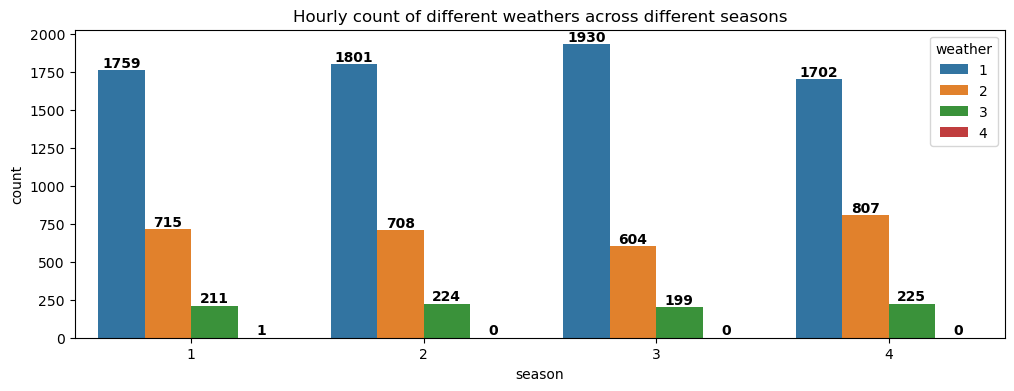

In [49]:
plt.figure(figsize=(12, 4))
f = sns.countplot(x=df['season'], hue=df['weather'])
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold')
plt.title('Hourly count of different weathers across different seasons')
plt.show()

## **Observations & Hypothesis formation:**
- We wish to find whether waether is dependent on season.
- Hence we propose the following:
    - ***H0: Weather does NOT depend on season***
        - That is weather & season are independent
    - ***H1: Weather does depend on season***
        - That is weather & season are independent
    - ***We propose to perform Chi-Squared test, setting significance level = 5%***

## **Assumptions for Chi-Squared test:**

- ***The data has to be categorical in nature***
    - Comments:
        - The data we have meets this condition
- ***The observations are independent***
    - Comments:
        - The data we have meets this condition
- ***Each cell is mutually exclusive***
    - Comments:
        - The data we have meets this condition
- ***Expected value in each cell is greater than 5 (at least in 80% of the cells)***
    - Comments:
        - The data we have does NOT meet this condition
        - Since there is only one observation where weather = 4, we can do thsi experiment without that data point

In [50]:
season_weather_mod = pd.crosstab(index=df['season'], columns=df['weather'])
season_weather_mod = season_weather_mod.iloc[: , :3]
season_weather_mod

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


## **Chi-squared test**

In [51]:
chi_stat, p_value, dof, expected = chi2_contingency(season_weather_mod)
print('chi_stat:', chi_stat, 'p_value:', p_value)
print('-'*100)
if p_value < 0.05:
    print("Reject H0, Accept H1")
else:
    print("Fail to reject H0")

chi_stat: 46.10145731073249 p_value: 2.8260014509929343e-08
----------------------------------------------------------------------------------------------------
Reject H0, Accept H1


## **Conclusion**
- ***Weather does depend on seson significantly.***

# **Final Comments**

- The variables which have a significant impact on the rental activity of Yulu e-bikes are:
    - Season
    - Weather
    - We also found out that season and weather are significantly dependent on each other
- Further, The rental activity of Yulu e-bikes had a fair amount of correlation (>0.3) with the following variables:
    - Feeling temperature (positive correlation @ 0.4)
    - Humidity (Negative correlatiob @ -0.3)
- Registered users account for 80% of the total renting activity while the remaining 20% can be accounted to casual users
- The MoM trend of renting activity has shown periods of steady growth follwed by periods od steady decline.
    - We also observed that over the last few months the renting activity is on the decline
- Renting of these bikes happens all throughout the 24 hours. However we found out the following:
    - 3PM-8PM is the time slot where the maximum renting happens
    - 9PM-2AM is the time where the least renting happens